In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set working path
path = '/Users/martinbogaert/Desktop/NBA Data Analysis/2022-2023 Awards Project clean/'

# MVP

In [3]:
data = pd.read_csv(path + 'Algorithm/mvp/mvp_data.csv')[['Player', 'Year', 'Share', 'Tm']]
data.head()

,Player,Year,Share,Tm
0,Aaron James,1978,0.0,NOJ
1,Fred Saunders,1978,0.0,NOJ
2,Freddie Boyd,1978,0.0,NOJ
3,Gail Goodrich,1978,0.0,NOJ
4,Jim McElroy,1978,0.0,NOJ


In [4]:
def cum_shares(df):
    
    df = df.sort_values('Year')
    df['Cum. shares'] = df['Share'].cumsum()
    if df['Share'].sum() >= 2:
        return df

In [5]:
df = data.groupby('Player').apply(cum_shares)
players = list(set(df.Player))
players.remove('Moses Malone')

In [6]:
tm_col = {'ATL': '#e03a3e', 'BOS': 'green','BRK': 'gray','CHI': '#ce1141','CHO': 'aqua','CLE': 'maroon','DAL': 'cornflowerblue',
          'DEN': 'indigo','DET': 'royalblue','GSW': 'gold','HOU': 'lightcoral','IND': 'yellow','LAC': 'silver','LAL': '#fdb927','MEM': 'skyblue','MIA': 'hotpink',
          'MIL': '#00471b','MIN': 'lime','NOP': 'goldenrod','NYK': 'darkorange','OKC': 'dodgerblue','ORL': 'navy',
          'PHI': 'blue','PHO': 'orange','POR': '#cf0a2c','SAC': 'mediumslateblue','SAS': 'white','TOR': 'purple',
          'UTA': 'forestgreen','WAS': 'midnightblue'}

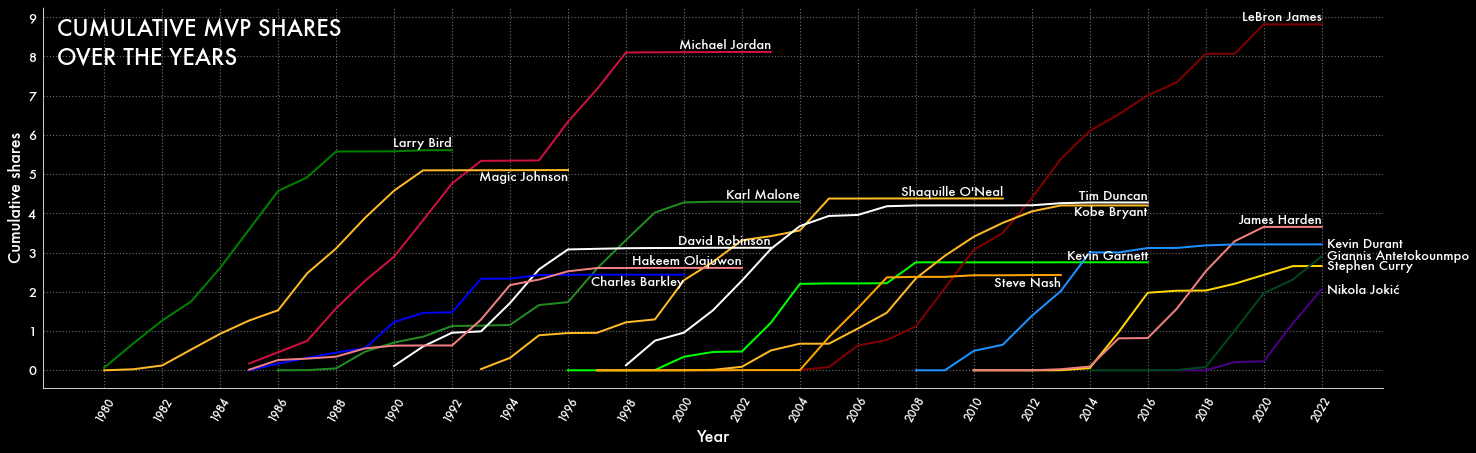

In [7]:
fig, ax = plt.subplots(figsize = (24,7), facecolor = 'black')

for player in players:

    dfp = df.loc[player]
    tm = max(set(list(dfp['Tm'])), key = list(dfp['Tm']).count)
    plt.plot(dfp['Year'], dfp['Cum. shares'], c = tm_col.get(tm), linewidth = 2)
    
    if player in ['Larry Bird', 'Michael Jordan', 'LeBron James', 'Karl Malone', "Shaquille O'Neal",
                  'David Robinson', 'Hakeem Olajuwon', 'Tim Duncan', 'Kevin Garnett', 'James Harden']:
        plt.annotate(player, xy = (dfp['Year'].iloc[-1], dfp['Cum. shares'].iloc[-1]),
                    color = 'white', fontname = 'futura', size = 13, va = 'bottom', ha = 'right')
        
    elif player in ['Magic Johnson', 'Charles Barkley', 'Kobe Bryant', 'Steve Nash']:
        plt.annotate(player, xy = (dfp['Year'].iloc[-1], dfp['Cum. shares'].iloc[-1] - 0.02),
                    color = 'white', fontname = 'futura', size = 13, va = 'top', ha = 'right')
        
    else:
        plt.annotate(player, xy = (dfp['Year'].iloc[-1] + 0.2, dfp['Cum. shares'].iloc[-1]),
                color = 'white', fontname = 'futura', size = 13, va = 'center')
        
        
plt.xlabel('Year', color = 'white', fontname = 'futura', size = 16)
plt.ylabel('Cumulative shares', color = 'white', fontname = 'futura', size = 16)
plt.xticks(np.arange(1980, 2023, 2), color = 'white', fontname = 'futura', rotation = 60, size = 11)
plt.yticks(np.arange(0, 10), color = 'white', fontname = 'futura', size = 13)
plt.grid(axis = 'both', alpha = 0.4, linestyle = ':', linewidth = 1.2, color = 'white') # Add a grid
        
ax_gca = plt.gca()
ax_gca.set_facecolor('black')

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.annotate('CUMULATIVE MVP SHARES\nOVER THE YEARS', xy = (0.01, 0.85), xycoords = 'axes fraction',
                color = 'white', fontname = 'futura', size = 22)

plt.savefig(path + 'cumshares_mvp_2.jpeg', dpi = 300)

plt.show()

# ROY

In [48]:
data = pd.read_csv(path + 'Algorithm/roy/roy_data.csv')

In [49]:
tm_col = {'ATL': '#e03a3e', 'BOS': 'green','BRK': 'gray','CHI': '#ce1141','CHO': 'aqua','CLE': 'maroon','DAL': 'cornflowerblue',
          'DEN': 'indigo','DET': 'royalblue','GSW': 'gold','HOU': 'lightcoral','IND': 'yellow','LAC': 'silver','LAL': '#fdb927','MEM': 'skyblue','MIA': 'hotpink',
          'MIL': '#00471b','MIN': 'lime','NOP': 'goldenrod','NYK': 'darkorange','OKC': 'dodgerblue','ORL': 'navy',
          'PHI': 'blue','PHO': 'orange','POR': '#cf0a2c','SAC': 'mediumslateblue','SAS': 'white','TOR': 'purple',
          'UTA': 'forestgreen','WAS': 'midnightblue', 'KCK' : 'mediumslateblue', 'NJN' : 'gray', 'SDC' : 'skyblue',
          'CHH' : 'aqua', 'CHA' : 'aqua', 'NOK' : 'aqua', 'SEA' : 'green'}

In [50]:
def roy_winner(df) :
    return df.nlargest(1, 'Share')

data = data.groupby('Year').apply(roy_winner)

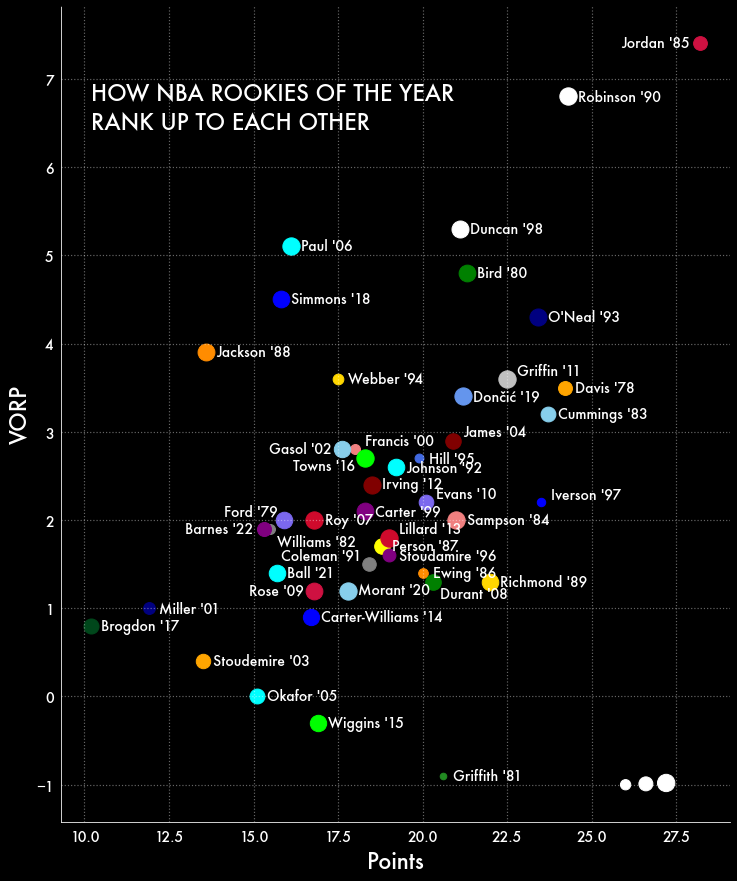

In [118]:
fig, ax = plt.subplots(figsize = (12,15), facecolor = 'black')

for player, vorp, share, yr, tm, pts in zip(data['Player'], data['VORP'], data['Share'], data['Year'], data['Tm'], data['PTS']):
    
    plt.scatter(pts, vorp, color = tm_col.get(tm), s = 300 * share ** 1.5)
    
    if player in ['Scottie Barnes', 'Derrick Rose', 'Pau Gasol', 'Michael Jordan'] :
        plt.annotate(player.split()[-1] + " '" + str(yr)[-2:], xy = (pts-0.3, vorp), color = 'white', fontname = 'futura',
                    va = 'center', size = 14, ha = 'right')
        
    elif player in ['Derrick Coleman', 'Phil Ford'] :
        plt.annotate(player.split()[-1] + " '" + str(yr)[-2:], xy = (pts-0.2, vorp+0.1), color = 'white', fontname = 'futura',
                    va = 'center', size = 14, ha = 'right')
        
    elif player in ['Steve Francis', 'Allen Iverson', 'Blake Griffin', 'LeBron James', 'Tyreke Evans', 'Damian Lillard'] :
        plt.annotate(player.split()[-1] + " '" + str(yr)[-2:], xy = (pts+0.3, vorp), color = 'white', fontname = 'futura',
                    va = 'bottom', size = 14)
        
    elif player in ['Kevin Durant', 'Buck Williams'] :
        plt.annotate(player.split()[-1] + " '" + str(yr)[-2:], xy = (pts+0.2, vorp-0.05), color = 'white', fontname = 'futura',
                    va = 'top', size = 14)
        
    elif player in ['Karl-Anthony Towns'] :
        plt.annotate(player.split()[-1] + " '" + str(yr)[-2:], xy = (pts-0.3, vorp), color = 'white', fontname = 'futura',
                    va = 'top', size = 14, ha = 'right')
        
    else :
        plt.annotate(player.split()[-1] + " '" + str(yr)[-2:], xy = (pts+0.3, vorp), color = 'white', fontname = 'futura',
                    va = 'center', size = 14)
    
    if tm_col.get(tm) is None:
        print(player, tm)
       
ax_gca = plt.gca()
ax_gca.set_facecolor('black')

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.xlabel('Points', color = 'white', fontname = 'futura', size = 22)
plt.ylabel('VORP', color = 'white', fontname = 'futura', size = 22)
plt.xticks(color = 'white', fontname = 'futura', size = 14)
plt.yticks(np.arange(-1, 8), color = 'white', fontname = 'futura', size = 14)
plt.grid(axis = 'both', alpha = 0.4, linestyle = ':', linewidth = 1.2, color = 'white') # Add a grid

plt.annotate('HOW NBA ROOKIES OF THE YEAR\nRANK UP TO EACH OTHER', xy = (0.045, 0.85), xycoords = 'axes fraction',
                color = 'white', fontname = 'futura', size = 22)

plt.scatter([26,26.6,27.2], [-1,-0.99,-0.98], color = 'white', s = [300*0.5**1.5,300*0.75**1.5,300*1**1.5])

plt.show()

# DPOY

In [10]:
data = pd.read_csv(path + 'Algorithm/dpoy/dpoy_data.csv')

In [72]:
data[['Player', 'Year', 'Tm']]

,,Player,Year,Tm
Year,,,,
1978,15,Walter Davis,1978,PHO
1979,65,Phil Ford,1979,KCK
1980,116,Larry Bird,1980,BOS
1981,127,Darrell Griffith,1981,UTA
1982,187,Buck Williams,1982,NJN
1983,227,Terry Cummings,1983,SDC
1984,271,Ralph Sampson,1984,HOU
1985,337,Michael Jordan,1985,CHI
1986,372,Patrick Ewing,1986,NYK
